### Project : “Web Scraping Flipkart: Data Cleaning, Visualization, and Insights”

In [1]:
# import libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
import re


In [2]:
# Lists to store scraped data
Tv_name = []
Tv_price = []
Tv_Display = []
Tv_rating = []
Tv_launch_year = []
Tv_sound_output = []
Tv_Model_ID = []

In [3]:
# Function to extract display type (LED / QLED / OLED / etc.)
def extract_display_type(text):
    text = text.lower()
    if "qled" in text:
        return "QLED"
    elif "oled" in text:
        return "OLED"
    elif "nanocell" in text:
        return "NanoCell"
    elif "led" in text:
        return "LED"
    else:
        return "Unknown"

# Loop through 20 pages
for i in range(1, 21):
    print(f"Scraping page {i}...")
    url = f"https://www.flipkart.com/search?q=Smart+tvs&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page={i}"
    ### Adding Request Headers
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/115.0.0.0 Safari/537.36"
    }

    response = requests.get(url, headers=headers)
    if response.status_code != 200:
        print(f" Page {i} failed to load (status {response.status_code})")
        continue

    soup = BeautifulSoup(response.text, "html.parser")

    # Extract TV name
    names = [x.text for x in soup.find_all("div", {"class": "KzDlHZ"})]
    Tv_name.extend(names)

    # Extract price
    prices = [x.text for x in soup.find_all("div", {"class": "Nx9bqj _4b5DiR"})]
    Tv_price.extend(prices)

    # Extract rating
    ratings = [x.text for x in soup.find_all("div", {"class": "XQDdHH"})]
    Tv_rating.extend(ratings)

    # Extract extra details (like Display, Sound, etc.)
    desc_blocks = soup.find_all("ul", {"class": "G4BRas"})
    for block in desc_blocks:
        desc = [li.text for li in block.find_all("li")]
        full_desc_text = " ".join(desc)
        
        # Extract display type from description or name
        display_type = extract_display_type(full_desc_text)
        if display_type == "Unknown" and names:
            display_type = extract_display_type(names[len(Tv_Display)] if len(Tv_Display) < len(names) else "")
        
        # Other attributes
        sound = next((d for d in desc if "Sound" in d or "Audio" in d), "N/A")
        model_id = next((d for d in desc if "Model" in d), "N/A")
        launch_year = next((d for d in desc if "Year" in d), "N/A")

        Tv_Display.append(display_type)
        Tv_sound_output.append(re.sub("Total Sound Output:",'',sound))
        Tv_Model_ID.append(re.sub("Model ID:",'',model_id))
        Tv_launch_year.append(re.sub('Launch Year:', '',launch_year))
    
    time.sleep(1)  # Be polite to Flipkart servers

Scraping page 1...
Scraping page 2...
Scraping page 3...
Scraping page 4...
Scraping page 5...
Scraping page 6...
Scraping page 7...
Scraping page 8...
Scraping page 9...
Scraping page 10...
Scraping page 11...
Scraping page 12...
Scraping page 13...
Scraping page 14...
Scraping page 15...
Scraping page 16...
Scraping page 17...
Scraping page 18...
Scraping page 19...
Scraping page 20...


In [4]:
# Make all lists same length
min_length = min(len(Tv_name), len(Tv_price), len(Tv_Display), len(Tv_rating),
                 len(Tv_launch_year), len(Tv_sound_output), len(Tv_Model_ID))

Tv_name = Tv_name[:min_length]
Tv_price = Tv_price[:min_length]
Tv_Display = Tv_Display[:min_length]
Tv_rating = Tv_rating[:min_length]
Tv_launch_year = Tv_launch_year[:min_length]
Tv_sound_output = Tv_sound_output[:min_length]
Tv_Model_ID = Tv_Model_ID[:min_length]

In [5]:
# Creating DataFrame
data = {
    "TV Name": Tv_name,
    "Price": Tv_price,
    "Display Type": Tv_Display,
    "Rating": Tv_rating,
    "Launch Year": Tv_launch_year,
    "Sound Output": Tv_sound_output,
    "Model ID": Tv_Model_ID
}

df = pd.DataFrame(data)
df

,TV Name,Price,Display Type,Rating,Launch Year,Sound Output,Model ID
0,realme TechLife 80 cm (32 inch) QLED HD Ready ...,"₹9,999",QLED,4.3,2025,26 W,32HDGQRDDAQ
1,Foxsky 109 cm (43 inch) QLED Ultra HD (4K) Sma...,"₹15,699",QLED,4.2,2024,30 W,43FS-LED TV
2,Foxsky 109 cm (43 inch) Full HD LED Smart Andr...,"₹11,499",LED,4.1,2023,30 W,43FS-VS//43FSFHS
3,MOTOROLA 80 cm (32 inch) QLED HD Ready Smart G...,"₹10,490",QLED,4.3,2025,40 W,32HDGQMDDAQ
4,Thomson Alpha QLED 60 cm (24 inch) QLED HD Rea...,"₹6,299",QLED,4,2025,24 W,24AlphaQ001
...,...,...,...,...,...,...,...
475,Samsung 163 cm (65 inch) QLED Ultra HD (4K) Sm...,"₹93,499",QLED,4,2025,20 W,QA65Q8FAAULXL
476,LG UQ7500 139 cm (55 inch) Ultra HD (4K) LED S...,"₹48,990",LED,4.2,2022,20 W,55UQ7500PSF
477,Haier 140 cm (55 inch) Ultra HD (4K) LED Smart...,"₹39,960",LED,4.2,2023,20 W,55P7GT
478,realme 108 cm (43 inch) Full HD LED Smart Andr...,"₹16,699",LED,3.8,2022,24 W,RMV2108


### Creating Perfect DataFrame

In [6]:
df['TV Name'] = df['TV Name'].apply(lambda x: re.sub(r'[^A-Za-z0-9&]+', '', re.split(r'\s+by\s+|\s+', x.strip(), maxsplit=1)[0]))
df['Price'] = df['Price'].apply(lambda x: float(re.search(r'\d+(?:,\d+)*(?:\.\d+)?', x).group().replace(',', '')) if isinstance(x, str) and re.search(r'\d', x) else None)
df

,TV Name,Price,Display Type,Rating,Launch Year,Sound Output,Model ID
0,realme,9999.0,QLED,4.3,2025,26 W,32HDGQRDDAQ
1,Foxsky,15699.0,QLED,4.2,2024,30 W,43FS-LED TV
2,Foxsky,11499.0,LED,4.1,2023,30 W,43FS-VS//43FSFHS
3,MOTOROLA,10490.0,QLED,4.3,2025,40 W,32HDGQMDDAQ
4,Thomson,6299.0,QLED,4,2025,24 W,24AlphaQ001
...,...,...,...,...,...,...,...
475,Samsung,93499.0,QLED,4,2025,20 W,QA65Q8FAAULXL
476,LG,48990.0,LED,4.2,2022,20 W,55UQ7500PSF
477,Haier,39960.0,LED,4.2,2023,20 W,55P7GT
478,realme,16699.0,LED,3.8,2022,24 W,RMV2108


### Save to CSV File

In [7]:
df.to_csv('Flipkart_SmartTV_Data.csv')

### Reading The CSV File

In [16]:
print('Total Rows and Columns:', df.shape)
print('Total Rows            :', len(df.index))
print('Total Columns         :', len(df.columns))
print('****************************************')
print('Total Null Values in Each Column:')
print(df.isnull().sum())
print('****************************************')
print('Data Types of Each Column:')
print(df.dtypes)

Total Rows and Columns: (480, 7)
Total Rows            : 480
Total Columns         : 7
****************************************
Total Null Values in Each Column:
TV Name         0
Price           0
Display Type    0
Rating          0
Launch Year     0
Sound Output    0
Model ID        0
dtype: int64
****************************************
Data Types of Each Column:
TV Name          object
Price           float64
Display Type     object
Rating           object
Launch Year      object
Sound Output     object
Model ID         object
dtype: object


# Univariate Analysis

### Distribution of TV Prices

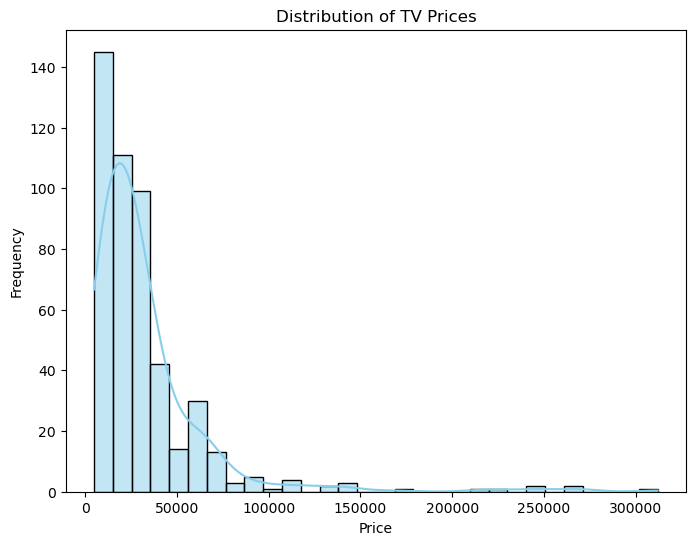

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
 
plt.figure(figsize=(8, 6))
sns.histplot(df['Price'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of TV Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

### Distribution of TV Ratings

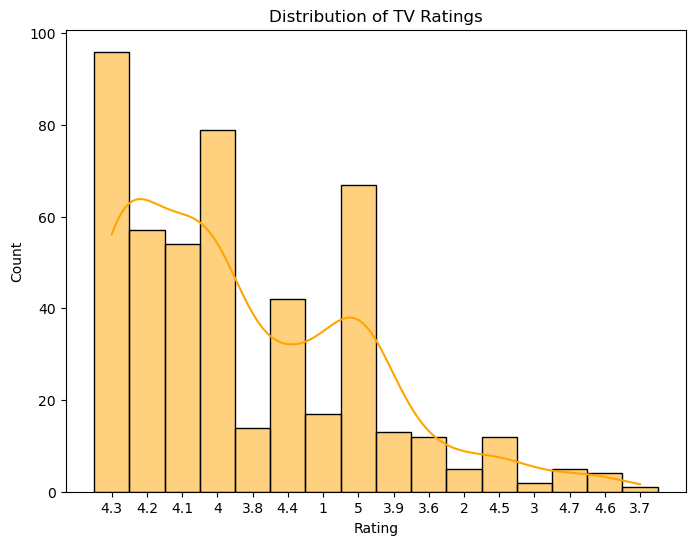

In [9]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Rating'], bins=20, kde=True, color='orange')
plt.title('Distribution of TV Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


### Count of TVs by Display Type

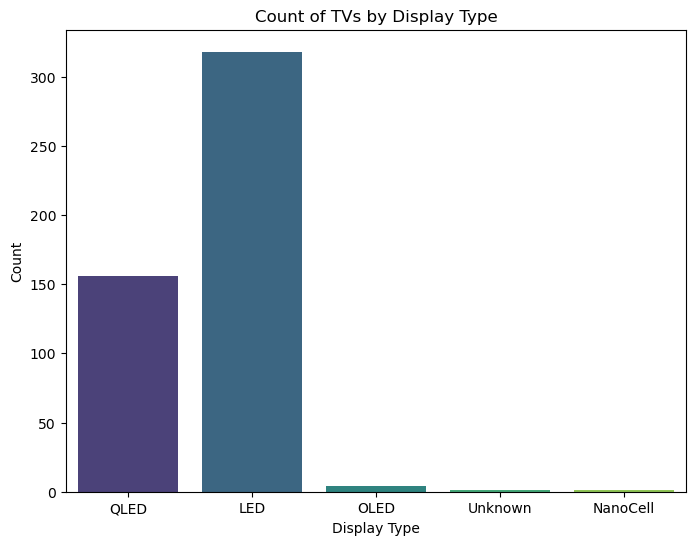

In [10]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Display Type', data=df, palette='viridis')
plt.title('Count of TVs by Display Type')
plt.xlabel('Display Type')
plt.ylabel('Count')
plt.show()


### Count of TVs by Launch Year

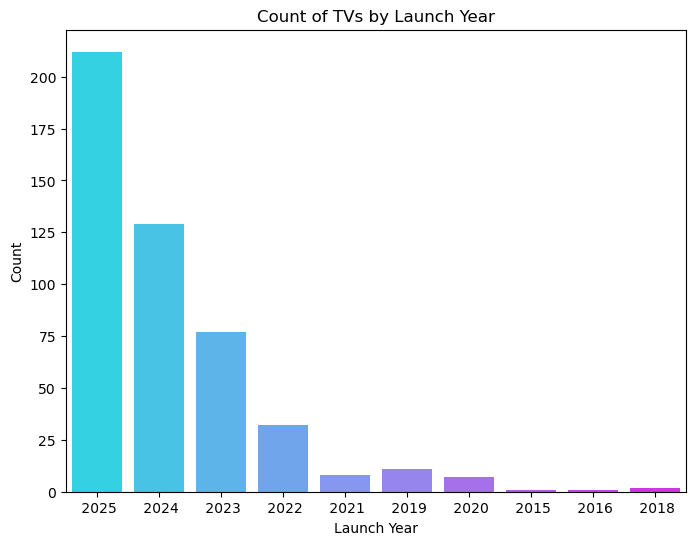

In [11]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Launch Year', data=df, palette='cool')
plt.title('Count of TVs by Launch Year')
plt.xlabel('Launch Year')
plt.ylabel('Count')
plt.show()


# Bivariate Analysis

### Price vs Rating by Display Type

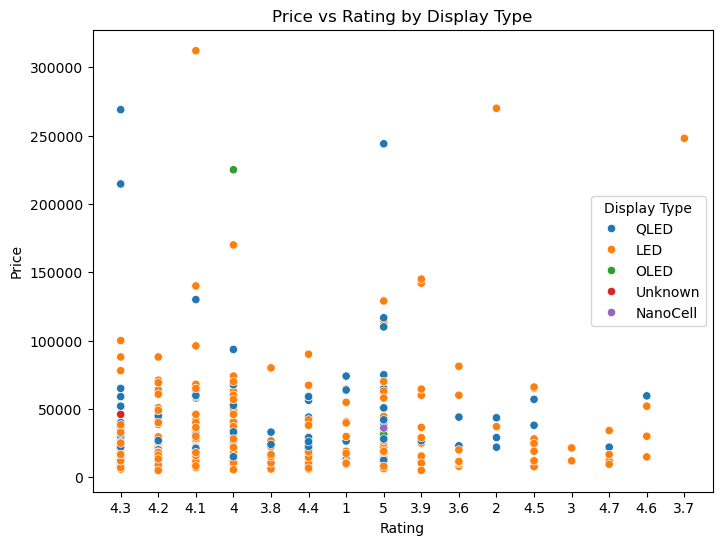

In [12]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Rating', y='Price', hue='Display Type', data=df)
plt.title('Price vs Rating by Display Type')
plt.xlabel('Rating')
plt.ylabel('Price')
plt.show()


### Average Price by Display Type

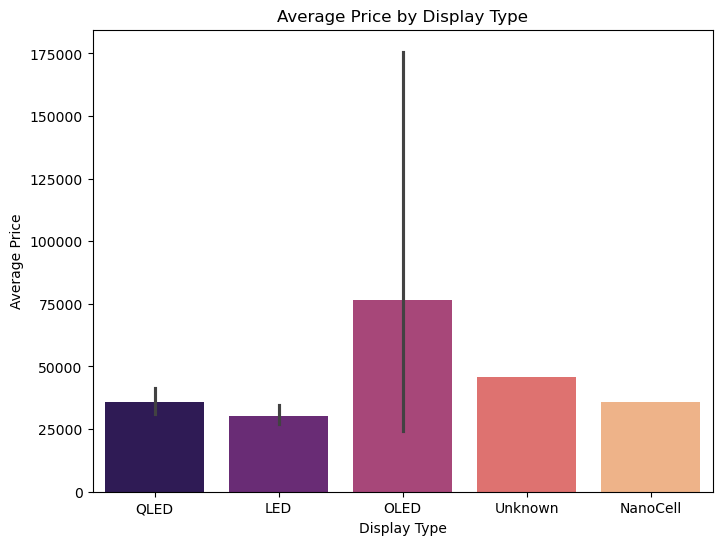

In [13]:
import numpy as np

plt.figure(figsize=(8, 6))
sns.barplot(x='Display Type', y='Price', data=df, estimator=np.mean, palette='magma')
plt.title('Average Price by Display Type')
plt.xlabel('Display Type')
plt.ylabel('Average Price')
plt.show()


### Average Price by Launch Year

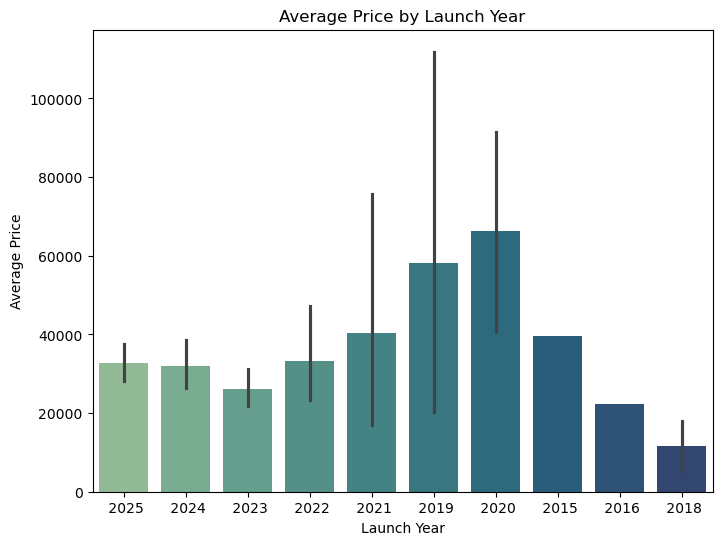

In [14]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Launch Year', y='Price', data=df, estimator=np.mean, palette='crest')
plt.title('Average Price by Launch Year')
plt.xlabel('Launch Year')
plt.ylabel('Average Price')
plt.show()


### Correlation Heatmap (Numeric Features)

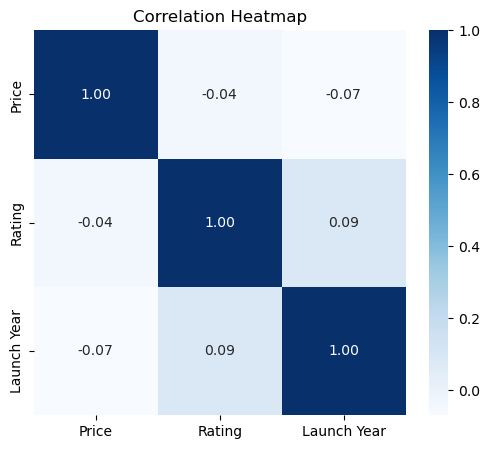

In [15]:
plt.figure(figsize=(6, 5))
sns.heatmap(df[['Price', 'Rating', 'Launch Year']].corr(), annot=True, cmap='Blues', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()
